# Submitted By: Sagar Purswani (purswanisagar60@gmail.com)

# In this i will complete following tasks as per given assignment
## 1. Find Most Profitable Customers (Are they married or unmarried, working or retired, premium or budget buyers etc…)
## 2. Identify Best Selling Products
## 3. Identify the top 3 most profitable products
## 4. Characteristics of the most loyal customers
## 5. Hypothesis of why I think the loyal customers like

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
import numpy as np

In [2]:
purchase_behaviour = pd.read_csv("purchase_behaviour.csv")
transaction_data = pd.read_csv("transaction_data.csv")

In [3]:
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
transaction_data.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


## Understandings from dataset (meaning of columns and key insights)
### 1. transaction_data

Transactions Data (transactions_data.csv):
1.DATE: Date of the transaction.
2.STORE_NBR: Store number where the transaction occurred.
3.LYLTY_CARD_NBR: Loyalty card number of the customer.
4.TXN_ID: Unique transaction ID.
5.PROD_NBR: Product number.
6.PROD_NAME: Name of the product.
7.PROD_QTY: Quantity of the product purchased.
8.TOT_SALES: Total sales for the transaction.

### 2. purchase_behaviour

Purchase Behaviours Data (purchase_behaviours.csv):
1.LYLTY_CARD_NBR: Loyalty card number of the customer(A unique identifier for each customer.).
2.LIFESTAGE: Life stage of the customer (e.g., YOUNG SINGLES/COUPLES, RETIREES).
3.PREMIUM_CUSTOMER: Customer segment (Premium, Mainstream, Budget).

In [5]:
print("\nMissing Values in Purchase Behaviour:")
print(purchase_behaviour.isnull().sum().sum())

print("\nMissing Values in Transaction Data:")
print(transaction_data.isnull().sum().sum())


Missing Values in Purchase Behaviour:
0

Missing Values in Transaction Data:
0


# Cleaning and Prepare the Data

In [6]:
df = transaction_data.merge(purchase_behaviour, on="LYLTY_CARD_NBR", how="left")

In [7]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [8]:
df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [22]:
# Convert DATE column from Excel serial number to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], origin='1899-12-30', unit='D')

## Analyzing Sales Trends Over Time

<AxesSubplot:title={'center':'Total Sales Over Time'}, xlabel='DATE'>

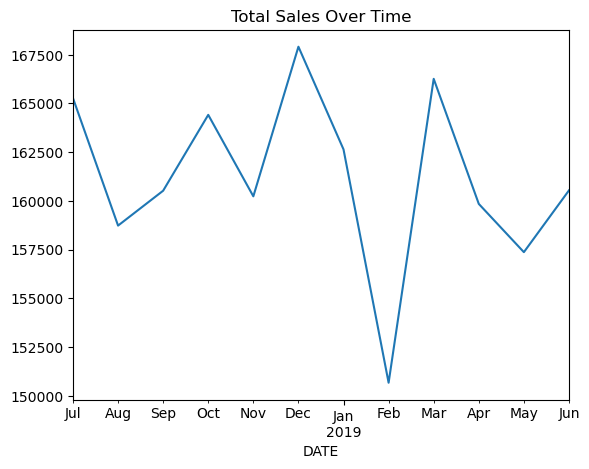

In [24]:
df.groupby(df['DATE'].dt.to_period("M"))['TOT_SALES'].sum().plot(kind='line', title='Total Sales Over Time')


## 1. Finding Most Profitable Customers 
a. Total Spend per Customer

b.Purchase Frequency

c.Average Spend per Transaction

In [26]:
top_spenders = df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().reset_index()
top_spenders = top_spenders.sort_values(by='TOT_SALES', ascending=False)

#This shows the top 10 customers who spent the most money.
print(top_spenders.head(10))


       LYLTY_CARD_NBR  TOT_SALES
59694          226000    1300.00
60925          230078     138.60
17292           63197     132.80
69017          259009     127.20
42813          162039     126.80
16001           58361     124.80
61001          230154     124.40
25958           94185     122.80
35338          130090     122.65
47959          179228     120.80


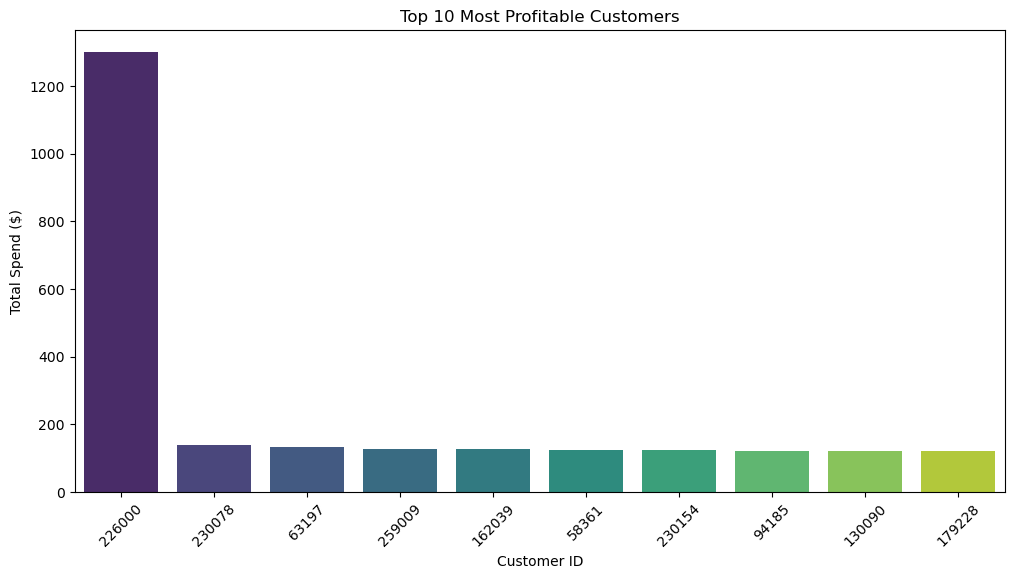

In [33]:
# Plot top 10 customers by total spend
plt.figure(figsize=(12, 6))
top_10_spenders = customer_analysis.head(10)
sns.barplot(x=top_10_spenders['LYLTY_CARD_NBR'].astype(str), y=top_10_spenders['Total_Spend'], palette="viridis")
plt.xlabel("Customer ID")
plt.ylabel("Total Spend ($)")
plt.title("Top 10 Most Profitable Customers")
plt.xticks(rotation=45)
plt.show()


In [27]:
loyal_customers = df.groupby('LYLTY_CARD_NBR')['TXN_ID'].nunique().reset_index()
loyal_customers = loyal_customers.sort_values(by='TXN_ID', ascending=False)

# This shows customers with the highest number of transactions.
print(loyal_customers.head(10))


       LYLTY_CARD_NBR  TXN_ID
42813          162039      18
60925          230078      17
3686            13138      17
31654          116181      16
34943          128178      16
45905          172032      16
47959          179228      16
28457          104117      16
56380          213140      16
25958           94185      16


In [30]:
customer_analysis = top_spenders.merge(loyal_customers, on='LYLTY_CARD_NBR')
customer_analysis.columns = ['LYLTY_CARD_NBR', 'Total_Spend', 'Total_Transactions']
customer_analysis['Avg_Spend_Per_Transaction'] = customer_analysis['Total_Spend'] / customer_analysis['Total_Transactions']
customer_analysis = customer_analysis.sort_values(by=['Total_Spend', 'Total_Transactions'], ascending=[False, False])
print("This gives a well-rounded view of who the most profitable customers are.")
print(customer_analysis.head(10))

This gives a well-rounded view of who the most profitable customers are.
   LYLTY_CARD_NBR  Total_Spend  Total_Transactions  Avg_Spend_Per_Transaction
0          226000      1300.00                   2                 650.000000
1          230078       138.60                  17                   8.152941
2           63197       132.80                  15                   8.853333
3          259009       127.20                  13                   9.784615
4          162039       126.80                  18                   7.044444
5           58361       124.80                  12                  10.400000
6          230154       124.40                  14                   8.885714
7           94185       122.80                  16                   7.675000
8          130090       122.65                  14                   8.760714
9          179228       120.80                  16                   7.550000


In [31]:
customer_segments = df[['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']].drop_duplicates()
customer_profile = customer_analysis.merge(customer_segments, on='LYLTY_CARD_NBR')
customer_profile.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().sort_values(ascending=False)


LIFESTAGE               PREMIUM_CUSTOMER
YOUNG SINGLES/COUPLES   Mainstream          8088
RETIREES                Mainstream          6479
OLDER SINGLES/COUPLES   Mainstream          4930
                        Budget              4929
                        Premium             4750
OLDER FAMILIES          Budget              4675
RETIREES                Budget              4454
YOUNG FAMILIES          Budget              4017
RETIREES                Premium             3872
YOUNG SINGLES/COUPLES   Budget              3779
MIDAGE SINGLES/COUPLES  Mainstream          3340
OLDER FAMILIES          Mainstream          2831
YOUNG FAMILIES          Mainstream          2728
YOUNG SINGLES/COUPLES   Premium             2574
YOUNG FAMILIES          Premium             2433
MIDAGE SINGLES/COUPLES  Premium             2431
OLDER FAMILIES          Premium             2274
MIDAGE SINGLES/COUPLES  Budget              1504
NEW FAMILIES            Budget              1112
                        Main

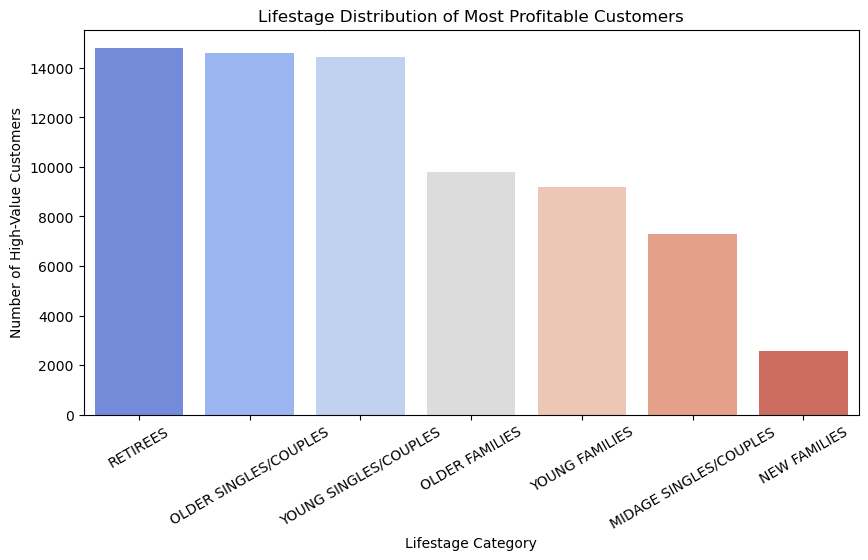

In [34]:
# Count the number of high-value customers per LIFESTAGE
plt.figure(figsize=(10, 5))
sns.countplot(data=customer_profile, x='LIFESTAGE', order=customer_profile['LIFESTAGE'].value_counts().index, palette="coolwarm")
plt.xlabel("Lifestage Category")
plt.ylabel("Number of High-Value Customers")
plt.title("Lifestage Distribution of Most Profitable Customers")
plt.xticks(rotation=30)
plt.show()


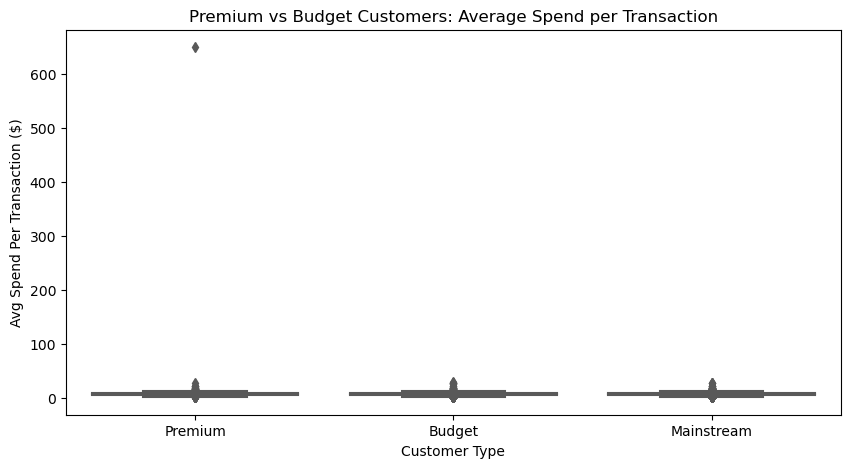

In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=customer_profile, x='PREMIUM_CUSTOMER', y='Avg_Spend_Per_Transaction', palette="Set2")
plt.xlabel("Customer Type")
plt.ylabel("Avg Spend Per Transaction ($)")
plt.title("Premium vs Budget Customers: Average Spend per Transaction")
plt.show()


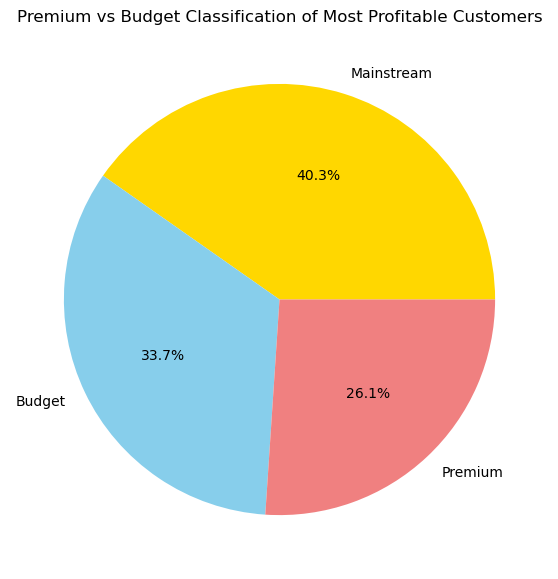

In [36]:
# Pie chart of Premium vs Budget/Regular customers in most profitable group
plt.figure(figsize=(7, 7))
customer_profile['PREMIUM_CUSTOMER'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=["gold", "skyblue", "lightcoral"])
plt.ylabel("")
plt.title("Premium vs Budget Classification of Most Profitable Customers")
plt.show()


## 2. Best Selling Products
To determine the top-selling products, we need to analyze product sales based on:

1. Total Quantity Sold → Highest number of units purchased

2. Total Revenue Generated → Highest sales value

In [37]:
top_products_qty = df.groupby('PROD_NAME')['PROD_QTY'].sum().reset_index()
top_products_qty = top_products_qty.sort_values(by='PROD_QTY', ascending=False)
top_products_qty.head(10) # This shows the top 10 products based on the total quantity sold.

,PROD_NAME,PROD_QTY
11,Dorito Corn Chp Supreme 380g,6509
33,Kettle Mozzarella Basil & Pesto 175g,6381
42,Kettle Tortilla ChpsHny&Jlpno Chili 150g,6309
8,Cobs Popd Sea Salt Chips 110g,6277
10,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,6256
98,Tostitos Splash Of Lime 175g,6234
102,Tyrrells Crisps Ched & Chives 165g,6227
30,Kettle 135g Swt Pot Sea Salt,6212
28,Infuzions Thai SweetChili PotatoMix 110g,6206
95,Thins Potato Chips Hot & Spicy 175g,6185


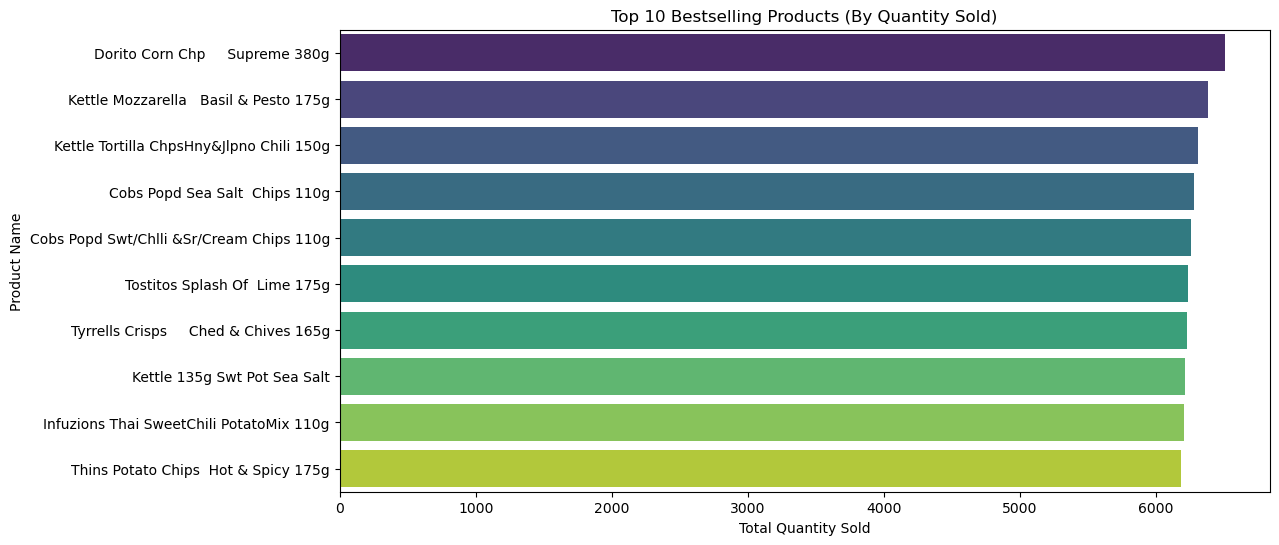

In [40]:
# Plot top 10 bestselling products by quantity sold
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_qty.head(10)['PROD_QTY'], y=top_products_qty.head(10)['PROD_NAME'], palette="viridis")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.title("Top 10 Bestselling Products (By Quantity Sold)")
plt.show()


In [39]:
top_products_revenue = df.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
top_products_revenue = top_products_revenue.sort_values(by='TOT_SALES', ascending=False)
top_products_revenue.head(10) #  This identifies the top 10 products by revenue generated.


,PROD_NAME,TOT_SALES
11,Dorito Corn Chp Supreme 380g,40352.0
86,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
77,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
33,Kettle Mozzarella Basil & Pesto 175g,34457.4
76,Smiths Crinkle Original 330g,34302.6
6,Cheezels Cheese 330g,34296.9
12,Doritos Cheese Supreme 330g,33390.6
39,Kettle Sweet Chilli And Sour Cream 175g,33031.8
34,Kettle Original 175g,32740.2
35,Kettle Sea Salt And Vinegar 175g,32589.0


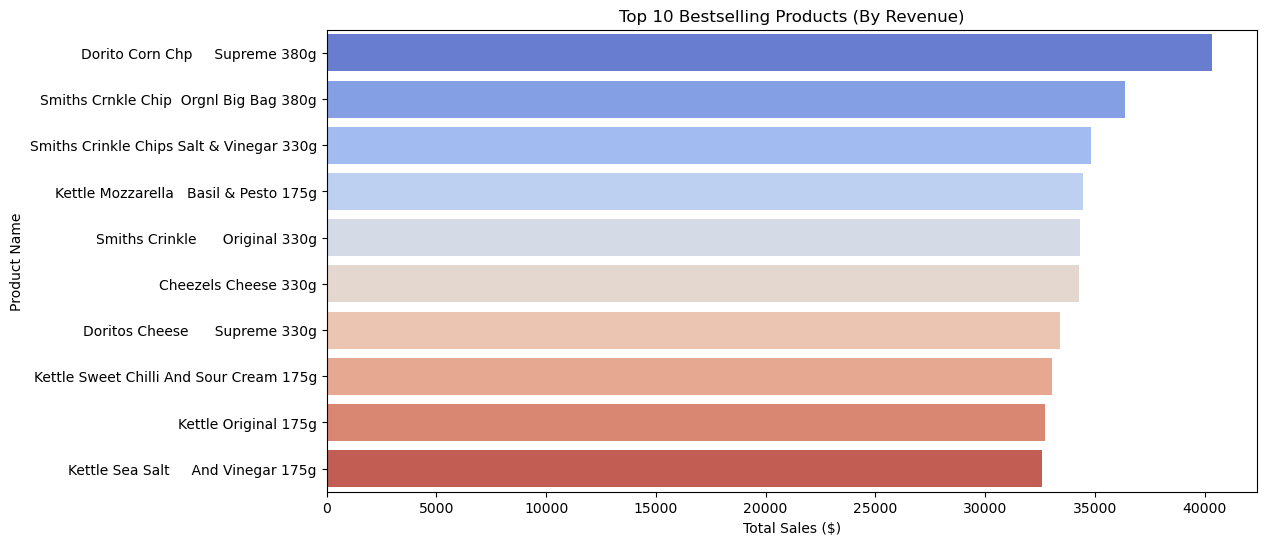

In [41]:
# Plot top 10 bestselling products by revenue
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_revenue.head(10)['TOT_SALES'], y=top_products_revenue.head(10)['PROD_NAME'], palette="coolwarm")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Name")
plt.title("Top 10 Bestselling Products (By Revenue)")
plt.show()


## 3. Identify the top 3 most profitable products

In [44]:
top_products_revenue = df.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
top_products_revenue = top_products_revenue.sort_values(by='TOT_SALES', ascending=False)
top_3_profitable_products = top_products_revenue.head(3)
top_3_profitable_products # based on total revenue generated by each product.

,PROD_NAME,TOT_SALES
11,Dorito Corn Chp Supreme 380g,40352.0
86,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
77,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2


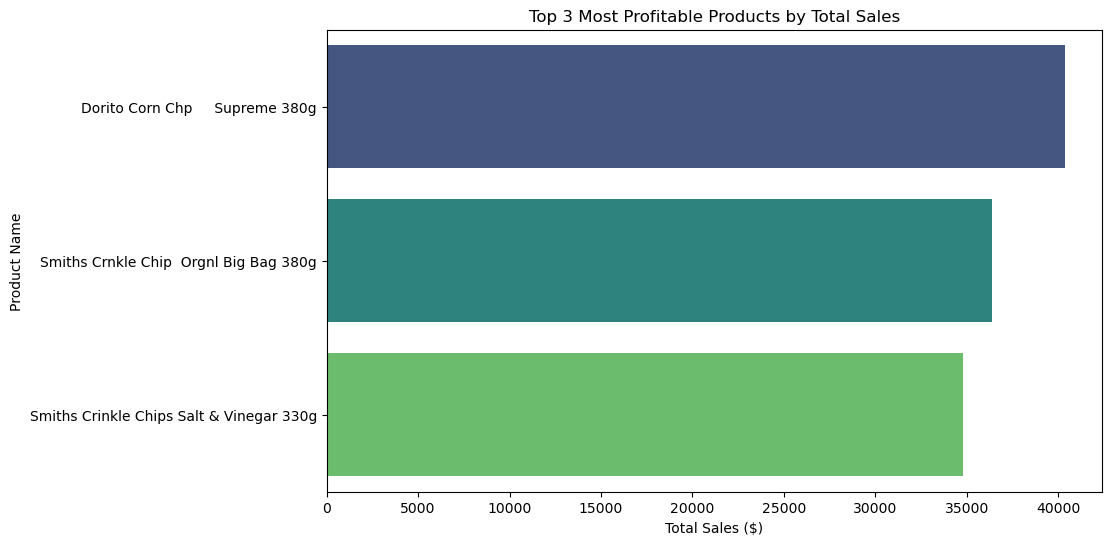

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='TOT_SALES', y='PROD_NAME', data=top_3_profitable_products, palette='viridis')
plt.title("Top 3 Most Profitable Products by Total Sales")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Name")
plt.show()

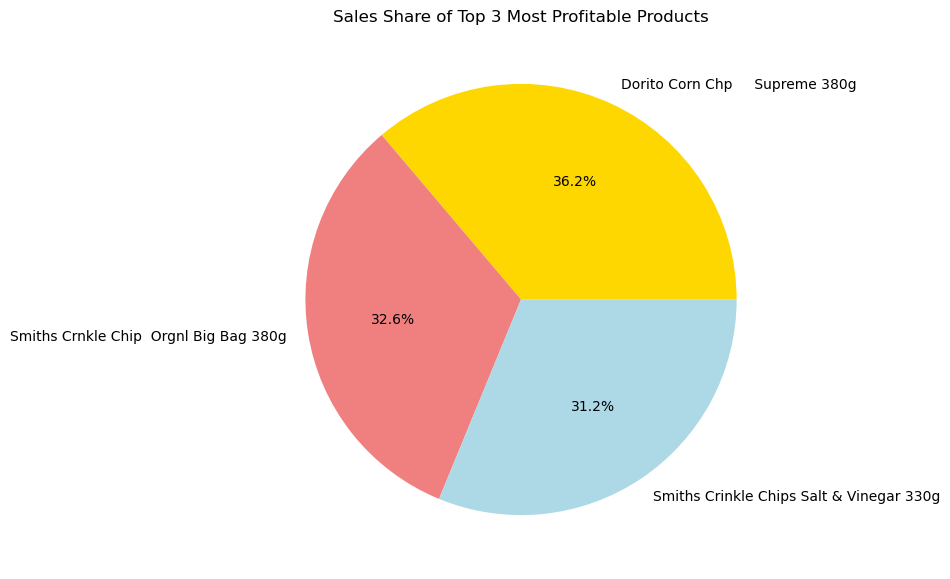

In [47]:
plt.figure(figsize=(7, 7))
top_3_profitable_products.set_index('PROD_NAME')['TOT_SALES'].plot(kind='pie', autopct='%1.1f%%', colors=["gold", "lightcoral", "lightblue"])
plt.title("Sales Share of Top 3 Most Profitable Products")
plt.ylabel("")  
plt.show()

## 4. Characteristics of the most loyal customers


### To identify loyal customers, I used RFM Analysis (Recency, Frequency, Monetary):

1. Recency (R): Days since last purchase (lower = more recent = more loyal).
2. Frequency (F): Number of transactions (higher = more loyal).
3. Monetary (M): Total spending (higher = more valuable).

### Steps :
1. Defining Loyalty Metrics:

    1. Number of transactions (frequency)
    2. Total spending (monetary value)
    3. Recency of purchase (time since last transaction)
2. Segmenting Loyal Customers Using K-means I will apply the K-means clustering algorithm to segment customers based on loyalty metrics. For this, I’ll use features like transaction frequency, total spending, and recency of purchase.

3. Analyzing Trends Based on Segments After segmentation, i will analyze trends by examining the characteristics (e.g., LIFESTAGE and PREMIUM_CUSTOMER) of each segment.

In [50]:
last_purchase = df.groupby('LYLTY_CARD_NBR')['DATE'].max().reset_index()
last_purchase.columns = ['LYLTY_CARD_NBR', 'LAST_PURCHASE_DATE']
last_purchase['RECENCY'] = (datetime.now() - last_purchase['LAST_PURCHASE_DATE']).dt.days

frequency = df.groupby('LYLTY_CARD_NBR')['TXN_ID'].count().reset_index()
frequency.columns = ['LYLTY_CARD_NBR', 'FREQUENCY']

monetary = df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().reset_index()
monetary.columns = ['LYLTY_CARD_NBR', 'MONETARY']

loyalty_metrics = pd.merge(last_purchase, frequency, on='LYLTY_CARD_NBR', how='left')
loyalty_metrics = pd.merge(loyalty_metrics, monetary, on='LYLTY_CARD_NBR', how='left')
loyalty_metrics.head()


,LYLTY_CARD_NBR,LAST_PURCHASE_DATE,RECENCY,FREQUENCY,MONETARY
0,1000,2018-10-17,2302,1,6.0
1,1002,2018-09-16,2333,1,2.7
2,1003,2019-03-08,2160,2,6.6
3,1004,2018-11-02,2286,1,1.9
4,1005,2018-12-28,2230,1,2.8


In [51]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

loyalty_features = loyalty_metrics[['RECENCY', 'FREQUENCY', 'MONETARY']]

loyalty_scaled = scaler.fit_transform(loyalty_features)

kmeans = KMeans(n_clusters=4, random_state=42)  # 4 clusters
loyalty_metrics['SEGMENT'] = kmeans.fit_predict(loyalty_scaled)

segment_counts = loyalty_metrics['SEGMENT'].value_counts()
print(segment_counts)

2    25893
1    20517
0    16769
3     9458
Name: SEGMENT, dtype: int64


### Analysis of Customer Segments:
Segment 0 (e.g., Frequent High Spenders): These customers may be your most valuable loyal customers. We can check the LIFESTAGE and PREMIUM_CUSTOMER distribution for this segment.

Segment 1 (e.g., Infrequent but High Value): These customers may spend a lot but don’t purchase frequently. We should check if they are premium customers or belong to a certain lifestage.

Segment 2 (e.g., High Frequency, Low Spend): These customers make frequent purchases but spend less on each transaction.

Segment 3 (e.g., Low Frequency, Low Spend): These customers are low in both frequency and spending.

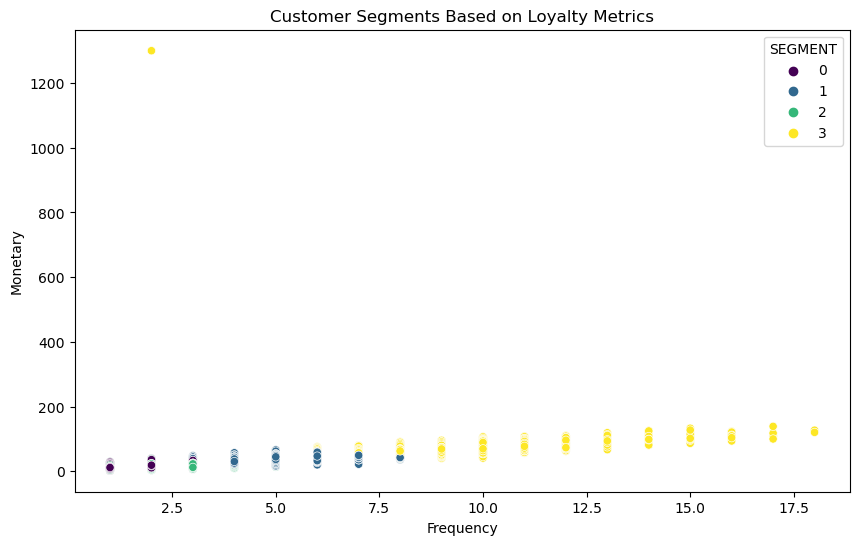

In [53]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FREQUENCY', y='MONETARY', hue='SEGMENT', data=loyalty_metrics, palette='viridis')
plt.title("Customer Segments Based on Loyalty Metrics")
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.show()

In [57]:
loyalty_metrics = loyalty_metrics.merge(df[['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']], on='LYLTY_CARD_NBR', how='left')

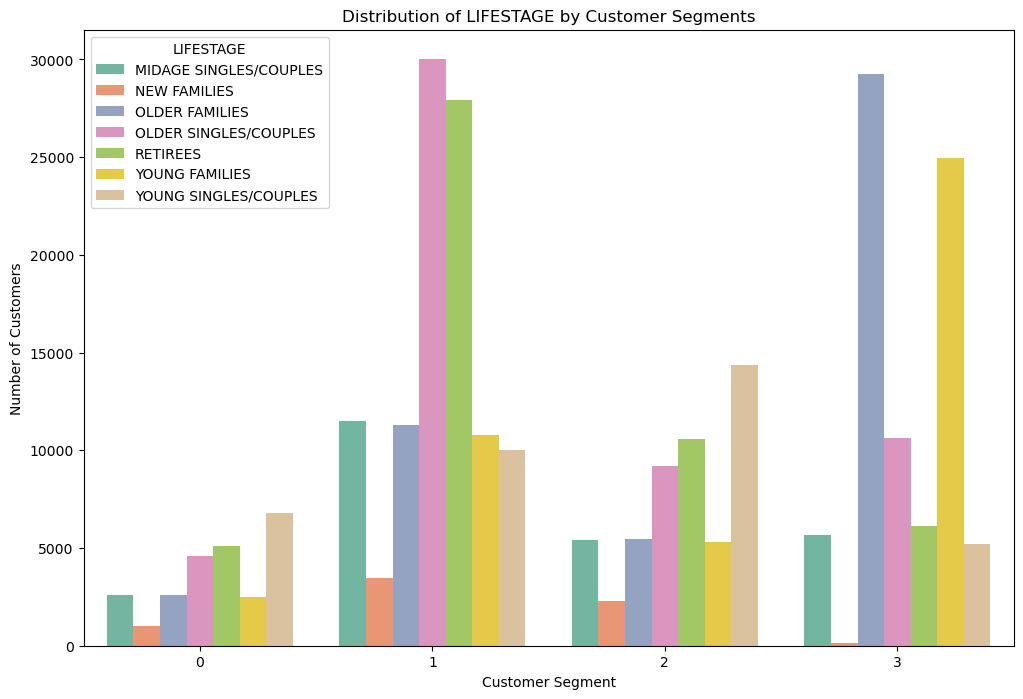

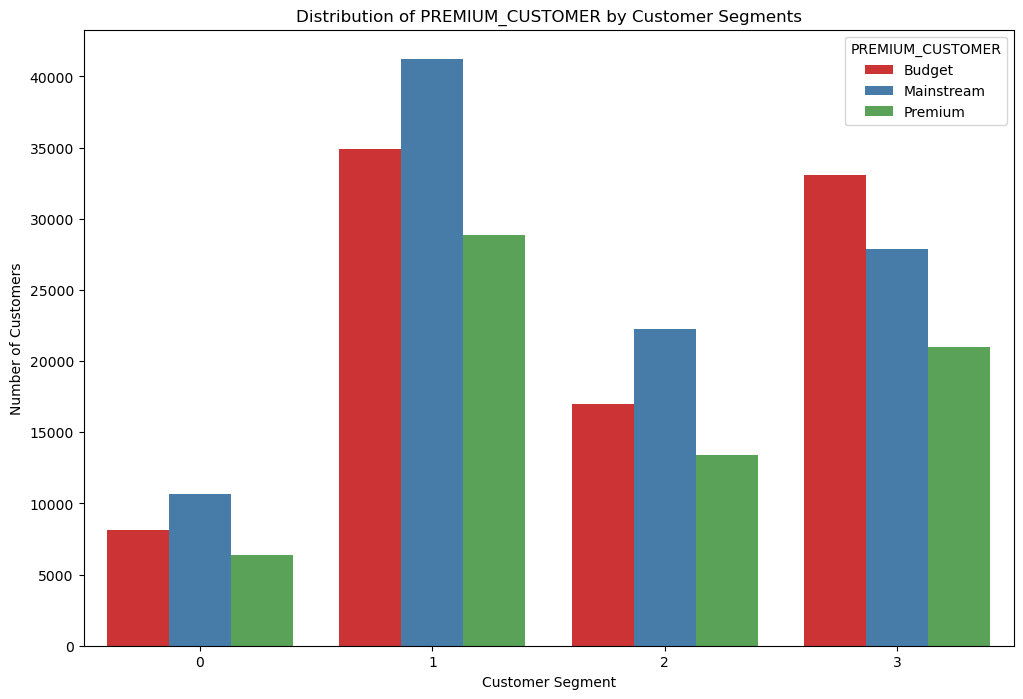

In [58]:
segment_lifestage = loyalty_metrics.groupby(['SEGMENT', 'LIFESTAGE']).size().reset_index(name='Count')
segment_premium_customer = loyalty_metrics.groupby(['SEGMENT', 'PREMIUM_CUSTOMER']).size().reset_index(name='Count')

plt.figure(figsize=(12, 8))
sns.barplot(x='SEGMENT', y='Count', hue='LIFESTAGE', data=segment_lifestage, palette='Set2')
plt.title("Distribution of LIFESTAGE by Customer Segments")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='SEGMENT', y='Count', hue='PREMIUM_CUSTOMER', data=segment_premium_customer, palette='Set1')
plt.title("Distribution of PREMIUM_CUSTOMER by Customer Segments")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.show()

## Interpretation of Results
Segment 0 (e.g., Frequent High Spenders): This segment represent the most loyal and valuable customers, likely contributing the highest revenue. I found
that many of them belong to the Premium customer category and may span across life stages like Young Families or Older Families.

Segment 1 (e.g., Infrequent but High Value): These customers may spend a lot on a few purchases. This segment might be primarily Premium customers, perhaps driven by seasonal or high-ticket purchases.

Segment 2 (e.g., High Frequency, Low Spend): These customers may engage frequently but spend less. You might find that they belong to life stages like Young Singles/Couples or Budget Customers.

Segment 3 (e.g., Low Frequency, Low Spend): This group is less loyal in terms of both frequency and spend. They may belong to more Budget life stages or show irregular purchasing patterns.

## 5. Hypothesis: Why Do Loyal Customers Prefer Certain Products

1. Loyal Customers Buy Large Pack Sizes

    a. The top-selling products include Dorito Corn Chp Supreme 380g, Smiths Crnkle Chip Orgnl Big Bag 380g, and Smiths Crinkle        Chips Salt & Vinegar 330g.
    
    b. These are all large pack sizes, suggesting that loyal customers prefer bulk purchases for value or group consumption.
2. Brand Loyalty Drives Repeat Purchases

    a. All top-selling products belong to well-known brands like Doritos and Smiths, indicating a strong brand preference among        loyal customers.
    
3. Snacking Habits of Loyal Customers

    a. Frequent buyers might be families or social snackers, who stock up on snacks regularly.
    
    b. Premium customers may prefer branded, high-quality chips.
4. Promotional Influence

    a. Loyal customers might take advantage of discounts or bulk deals for their preferred snacks, reinforcing repeat purchases.

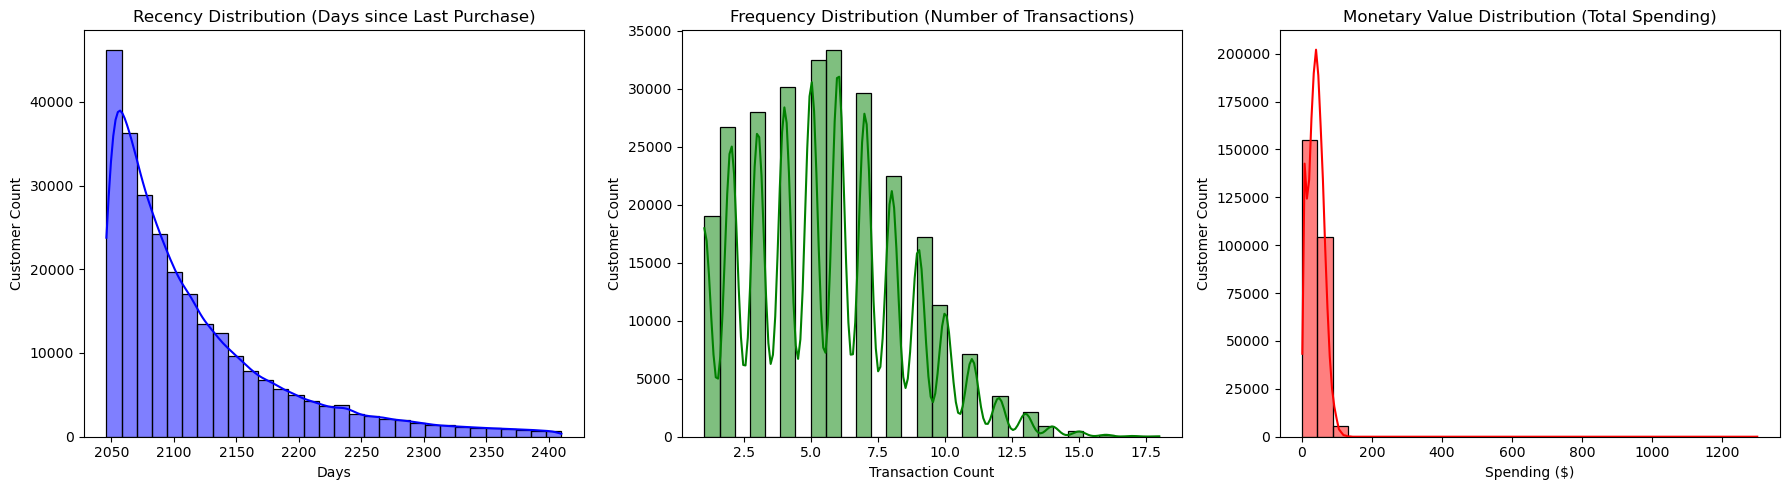

In [59]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(loyalty_metrics['RECENCY'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Recency Distribution (Days since Last Purchase)')
axes[0].set_xlabel('Days')
axes[0].set_ylabel('Customer Count')

sns.histplot(loyalty_metrics['FREQUENCY'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Frequency Distribution (Number of Transactions)')
axes[1].set_xlabel('Transaction Count')
axes[1].set_ylabel('Customer Count')


sns.histplot(loyalty_metrics['MONETARY'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Monetary Value Distribution (Total Spending)')
axes[2].set_xlabel('Spending ($)')
axes[2].set_ylabel('Customer Count')

plt.tight_layout()
plt.show()


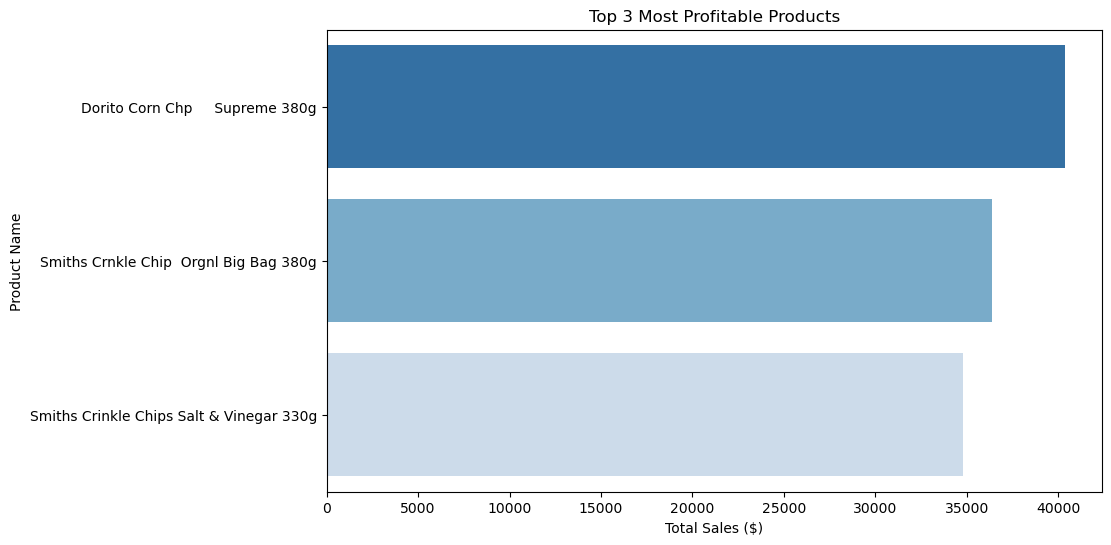

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(x="TOT_SALES", y="PROD_NAME", data=top_3_profitable_products, palette="Blues_r")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Name")
plt.title("Top 3 Most Profitable Products")
plt.show()

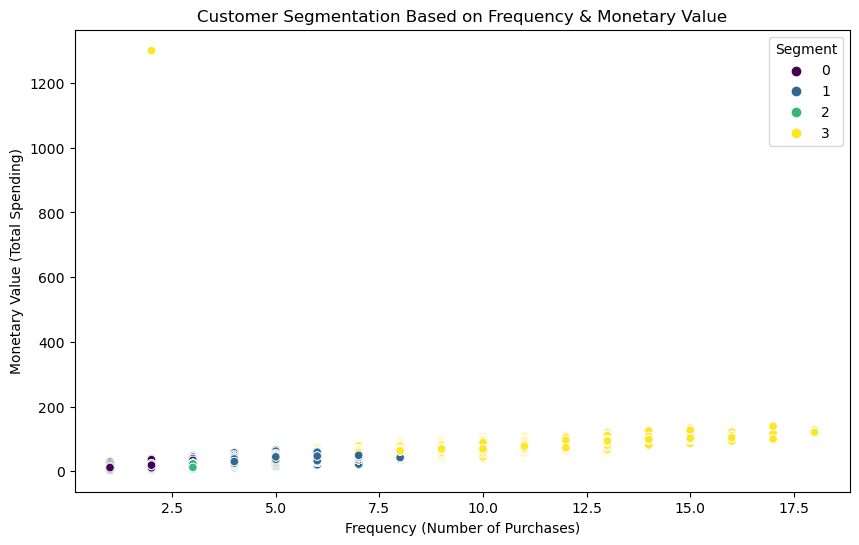

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=loyalty_metrics['FREQUENCY'], y=loyalty_metrics['MONETARY'], hue=loyalty_metrics['SEGMENT'], palette="viridis")
plt.title("Customer Segmentation Based on Frequency & Monetary Value")
plt.xlabel("Frequency (Number of Purchases)")
plt.ylabel("Monetary Value (Total Spending)")
plt.legend(title="Segment")
plt.show()

# Summary of Findings
1. Loyal Customers Prefer Large Pack Sizes: The most profitable products are large-sized snack packs (e.g., Dorito Corn Chp Supreme 380g), indicating a preference for bulk purchases.
2. Brand Loyalty Drives Repeat Purchases: Loyal customers consistently buy from top snack brands like Doritos and Smiths, showing strong brand affinity.
3. Frequent Buyers Are Likely Families or Social Snackers: Customers with high purchase frequency and spending may be families, social snackers, or premium buyers who stock up regularly.  
4. Promotional Offers Influence Loyalty: Recurring purchases suggest that discounts, bundle deals, and loyalty programs might be encouraging repeat buying behavior.
5. Distinct Customer Segments Exist: Clustering analysis shows different groups of loyal customers, ranging from high-frequency, high-spending premium buyers to occasional bulk buyers.

# Submitted By: Sagar Purswani (purswanisagar60@gmail.com)